## Exploratory Data Analysis

#### [Dataset Source](https://www.citycam-cmu.com/dataset )

The dataset was created using the existing video streams captured by 564 surveillance cameras in NYC. It is an annotated citycam dataset, which contains thousands of images and frames broken down from the video streams. Each frame has an xml file associated with it, which contains the bounding box coordinates of all the vehicles and pedestrians in the frame.

Using the data given in the xmls, it becomes easier for us to identify cars, buses and pedestrians in our input. This can prove to be useful during the training phase later on. 

In [23]:
%pylab inline
import os, sys
import xml.etree.ElementTree as ET
import matplotlib.patches as patches
import matplotlib.pyplot as pl
import time
import pylab as pl
from IPython import display

Populating the interactive namespace from numpy and matplotlib


/Users/ajitheshn/anaconda3/envs/code/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['display']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Reading the Data

We read the data and parse the XML file that contains the bounding values ,resulting after Object detection algorithm. we then parse the XML into the image to identify the number of vehicles in the vicinity.

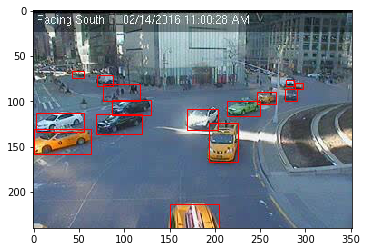

In [49]:
tree = ET.parse('../Desktop/SampleData/000007.xml')
im = imread('../Desktop/SampleData/000007.jpg')
    #imshow(im)
root = tree.getroot()
root.tag
root.attrib
bounding_boxes = []
for child in root:
        #print(child.tag, child.attrib)
    for x in child:
            #print("     ",x.tag, x.attrib)
        bounding_box_child = []
        for y in x:
                #print("             ", y.tag, y.attrib)
                #print("                  ", y.text)
            bounding_box_child.append(y.text)
        if len(bounding_box_child) == 4:
            bounding_boxes.append(bounding_box_child)

    # Create figure and axes
fig,ax = plt.subplots(1)

    # Display the image
ax.imshow(im)

   # Create a Rectangle patch
for coord in bounding_boxes:
    width = int(coord[0]) - int(coord[1])
    height = int(coord[2]) - int(coord[3])
    rect = patches.Rectangle((int(coord[1]),int(coord[3])),width,height,linewidth=1,edgecolor='r',facecolor='none')

        # Add the patch to the Axes
    ax.add_patch(rect)
    
plt.show()

# Counting the number of Vehicles

Here we introduce num_rec value which is instantiated to 0, for every XML parsing we increment the value by 1 therefore resulting in the total number of vehicles.

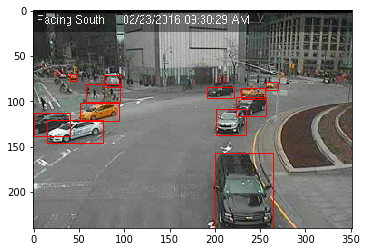

number of vehicles =  12


In [50]:
tree = ET.parse('../Desktop/SampleData/000008.xml')
im = imread('../Desktop/SampleData/000008.jpg')
    #imshow(im)
root = tree.getroot()
root.tag
root.attrib
bounding_boxes = []
for child in root:
        #print(child.tag, child.attrib)
    for x in child:
            #print("     ",x.tag, x.attrib)
        bounding_box_child = []
        for y in x:
                #print("             ", y.tag, y.attrib)
                #print("                  ", y.text)
            bounding_box_child.append(y.text)
        if len(bounding_box_child) == 4:
            bounding_boxes.append(bounding_box_child)

    # Create figure and axes
fig,ax = plt.subplots(1)

    # Display the image
ax.imshow(im)

   # Create a Rectangle patch
num_rec = 0
for coord in bounding_boxes:
    width = int(coord[0]) - int(coord[1])
    height = int(coord[2]) - int(coord[3])
    rect = patches.Rectangle((int(coord[1]),int(coord[3])),width,height,linewidth=1,edgecolor='r',facecolor='none')

        # Add the patch to the Axes
    ax.add_patch(rect)
    num_rec=num_rec+1
plt.show()

print('number of vehicles = ', num_rec)

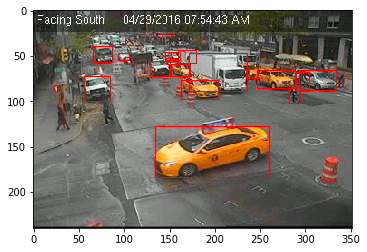

number of vehicles =  17


In [51]:
tree = ET.parse('../Desktop/SampleData/000009.xml')
im = imread('../Desktop/SampleData/000009.jpg')
    #imshow(im)
root = tree.getroot()
root.tag
root.attrib
bounding_boxes = []
for child in root:
        #print(child.tag, child.attrib)
    for x in child:
            #print("     ",x.tag, x.attrib)
        bounding_box_child = []
        for y in x:
                #print("             ", y.tag, y.attrib)
                #print("                  ", y.text)
            bounding_box_child.append(y.text)
        if len(bounding_box_child) == 4:
            bounding_boxes.append(bounding_box_child)

    # Create figure and axes
fig,ax = plt.subplots(1)

    # Display the image
ax.imshow(im)

   # Create a Rectangle patch
num_rec = 0
for coord in bounding_boxes:
    width = int(coord[0]) - int(coord[1])
    height = int(coord[2]) - int(coord[3])
    rect = patches.Rectangle((int(coord[1]),int(coord[3])),width,height,linewidth=1,edgecolor='r',facecolor='none')

        # Add the patch to the Axes
    ax.add_patch(rect)
    num_rec=num_rec+1
plt.show()

print('number of vehicles = ', num_rec)

# Individual Parsing of XML

Continuous parsing of XML for every image available in the SampleData folder

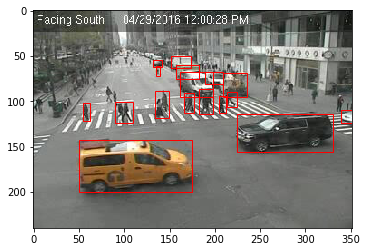

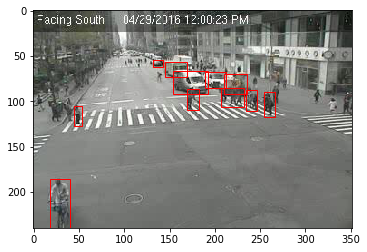

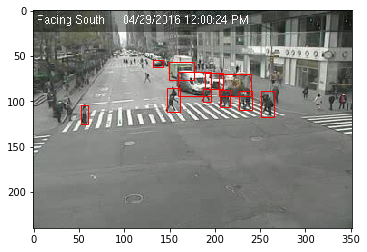

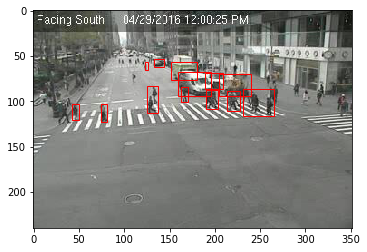

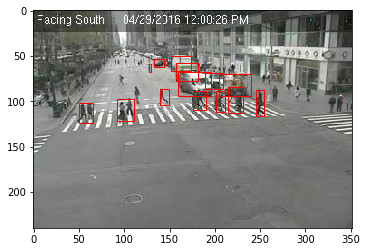

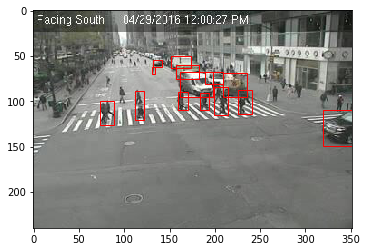

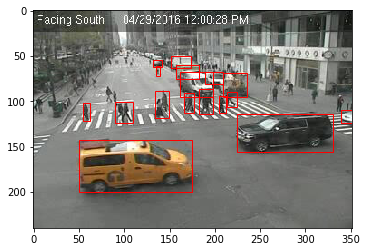

In [59]:
i = 1
while i<7:
    j = str(i)
    tree = ET.parse('../Desktop/SampleData/00000'+j+'.xml')
    im = imread('../Desktop/SampleData/00000'+j+'.jpg')
    #imshow(im)
    root = tree.getroot()
    root.tag
    root.attrib
    bounding_boxes = []
    for child in root:
        #print(child.tag, child.attrib)
        for x in child:
            #print("     ",x.tag, x.attrib)
            bounding_box_child = []
            for y in x:
                #print("             ", y.tag, y.attrib)
                #print("                  ", y.text)
                bounding_box_child.append(y.text)
            if len(bounding_box_child) == 4:
                bounding_boxes.append(bounding_box_child)

    # Create figure and axes
    fig,ax = plt.subplots(1)

    # Display the image
    ax.imshow(im)

    # Create a Rectangle patch
    for coord in bounding_boxes:
        width = int(coord[0]) - int(coord[1])
        height = int(coord[2]) - int(coord[3])
        rect = patches.Rectangle((int(coord[1]),int(coord[3])),width,height,linewidth=1,edgecolor='r',facecolor='none')

        # Add the patch to the Axes
        ax.add_patch(rect)
        #pl.plot(pl.randn(100))
        display.clear_output(wait=True)
        display.display(fig)
        time.sleep(0.1)
    
    i = i+1


# Introducing Bias

Since the algorithm also counts the number of people in the vicinity, there must exist a threshold value to differentate between vehicles and other objects.

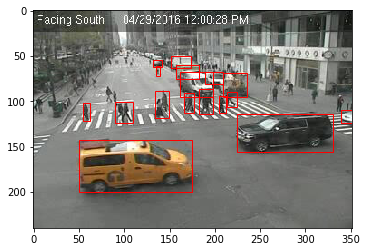

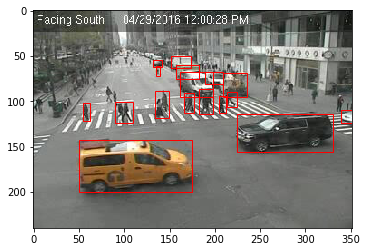

17
The final corrected values 12


In [73]:
i = 1
while i<7:
    j = str(i)
    tree = ET.parse('../Desktop/SampleData/00000'+j+'.xml')
    im = imread('../Desktop/SampleData/00000'+j+'.jpg')
    #imshow(im)
    root = tree.getroot()
    root.tag
    root.attrib
    bounding_boxes = []
    for child in root:
        #print(child.tag, child.attrib)
        for x in child:
            #print("     ",x.tag, x.attrib)
            bounding_box_child = []
            for y in x:
                #print("             ", y.tag, y.attrib)
                #print("                  ", y.text)
                bounding_box_child.append(y.text)
            if len(bounding_box_child) == 4:
                bounding_boxes.append(bounding_box_child)

    # Create figure and axes
    fig,ax = plt.subplots(1)

    # Display the image
    ax.imshow(im)

    # Create a Rectangle patch
    num_rec =0
    for coord in bounding_boxes:
        width = int(coord[0]) - int(coord[1])
        height = int(coord[2]) - int(coord[3])
        rect = patches.Rectangle((int(coord[1]),int(coord[3])),width,height,linewidth=1,edgecolor='r',facecolor='none')

        # Add the patch to the Axes
        ax.add_patch(rect)
        num_rec=num_rec+1
    #pl.plot(pl.randn(100))
    display.clear_output(wait=True)
    display.display(fig)
    time.sleep(0.1)
    plt.show()
    print(num_rec)
    i = i+1

bias_threshold = 5
final_rec = num_rec - bias_threshold
print('The final corrected values', final_rec)


# Conclusion

1. At different times the traffic varies which must be taken into consideration for implementing the traffic algorithm.
2. The Bias is hardcoded, which means there must exist a way that differentiates other objects from vehicles and count them individually which can be acheived by M_RCNN or YOLO.
3. Implementing an intelligent traffic scheduling algorithm that automatically updates itself depending upon the values generated by (2).
4. Increase the traffic algorithm runtime and reduce the wait time of vehicles, it is also obeserved that in certain rare cases there exists abnormalities such as fire engines, ambulances which involves special care.
5. The ratio of people:vehicles is less that is 12:17 which doesn't mean that the scheduling algorithm priorities vehicles only, there must exist a way to identify which is enough that is whether the amount of people is enough to change the traffic algorithm.

# Future Scope

1. Implementing special cases (for ambulances, fire trucks etc).
2. Implementing Deep Learning Algorithms for the Traffic Scheduler.
3. Real Time Object detection, increasing efficiency and predictive algorithms.

# References

1. Dataset -  https://drive.google.com/open?id=1e3NtzpwBcUeakcfiYo_gB2IgxxFIGkVe
2. http://www.andrew.cmu.edu/user/shanghaz/
3. https://www.citycam-cmu.com/dataset
4. https://arxiv.org/pdf/1703.05868.pdf
(Other detailed references are included in the pdf)